#Explainable AI by ChatGPT for ChatGPT
Copyright 2023 Denis Rothman, MIT License

**First level Explainable AI(XAI)**

This notebook introduces first level explainable AI by GPT-4 for GPT-4. It shows how you can invent tasks through prompt engineering. Your imagination is the limit.

The notebook will take you from an introduction with ChatGPT to explainable AI with ChatGPT:

- Introduction Dialog with ChatGPT
- First level XAI
- Sentiment Analyis and XAI
- SHAP for XAI
- Next Steps

**NOTE**: This notebook is a general purpose notebook to show the potential of ChatGPT for first level XAI. The results may or may not be perfect and may require more prompt engineering.

Denis Rothman: What is Explainable AI?

#Introduction Dialog with ChatGPT

**Denis Rothman: What is Explainable AI?**

**ChatGPT:** 

Explainable AI (XAI) refers to a subfield of artificial intelligence focused on developing techniques and methods that make the decision-making process of AI systems more transparent, interpretable, and understandable by humans. Traditional AI systems, particularly deep learning models like neural networks, are often considered "black boxes" because it is difficult to comprehend how they arrive at specific outcomes or predictions.

The primary goal of Explainable AI is to bridge this gap, enabling human users to trust and engage with AI systems more effectively. This is particularly important in critical domains, such as healthcare, finance, and law enforcement, where understanding the rationale behind AI-generated decisions is crucial for ethical and legal reasons.

Some key components and approaches in Explainable AI include:

Interpretable models: Designing AI systems that are inherently more interpretable and less complex, such as decision trees or linear models, while still maintaining performance.
Post-hoc explanations: Generating explanations after a model has made a prediction. Techniques like LIME (Local Interpretable Model-agnostic Explanations) and SHAP (SHapley Additive exPlanations) are examples of post-hoc explanation methods.
Visualizations: Creating visual representations of the inner workings of an AI model, which can help users understand the relationships between input features and the model's predictions.
Rule extraction: Converting the knowledge embedded in a complex AI model into human-understandable rules or decision-making processes.
By enhancing the transparency and interpretability of AI systems, Explainable AI aims to increase trust in AI, facilitate more effective collaboration between humans and machines, and ensure that AI-driven decisions are ethical, fair, and accountable.

GPT-3.5-turbo provides explanations in sentiment analysis such as the reasons for a sentiment analysis such as "ChatGPT response: Positive sentiment words: wonderful, light-hearted, witty, likable, fully in control, grown to love, wittier, interesting, great. " Can we consider this as explainable AI?

ChatGPT:Yes, the example you provided can be considered a form of Explainable AI, albeit a relatively simple one. When GPT-3.5-turbo generates explanations for sentiment analysis by highlighting the positive and negative words contributing to the overall sentiment, it is effectively offering a level of transparency and interpretability into the reasoning behind its predictions.

However, it's important to note that the explanations provided by GPT-3.5-turbo may not be as comprehensive or rigorous as those produced by specialized Explainable AI techniques like LIME or SHAP. In this case, the explanations are primarily based on the presence of specific words or phrases in the input text, which may not always capture the full complexity of the model's decision-making process.

Nonetheless, these simplified explanations can still be helpful in many situations where users need a quick and intuitive understanding of the model's output, and they contribute to increasing trust and interpretability in AI systems.

#First level XAI

## Installing openai and API key

In [9]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4


In [10]:
#Importing openai
try:
  import openai
except:
  !pip install openai
  import openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 16.5 MB/s eta 0:00:00


API Key

In [11]:
#2.API Key
#Store you key in a file and read it(you can type it directly in the notebook but it will be visible for somebody next to you)
from google.colab import drive
drive.mount('/content/drive')
f = open("drive/MyDrive/files/api_key.txt", "r")
API_KEY=f.readline()
f.close()

#The OpenAI Key
import os
os.environ['OPENAI_API_KEY'] =API_KEY
openai.api_key = os.getenv("OPENAI_API_KEY")

Mounted at /content/drive


## Dataset

The goal of the dataset is to run sentiment analysis.

The dataset consists of five movie reviews. The first three come from the [Kaggle movie review dataset](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews). The two last ones were created for this notebook.

You can replace the data by social media posts, e-commerce comments or any other text.

Note: the dataset is small because OpenAI API requests are not free. Always keep an eye on your API budget.


This first list contains the raw data(reviews) without the prompt.

In [12]:
mreviews = []
mreviews.append("A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only has got all the polari but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.")
mreviews.append("I thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her sexy image and jumped right into a average, but spirited young woman.This may not be the crown jewel of his career, but it was wittier than Devil Wears Prada and more interesting than Superman a great comedy to go see with friends.")
mreviews.append("Petter Matteis Love in the Time of Money is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. This being a variation on the Arthur Schnitzler's play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. A big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case with most of the people we encounter.The acting is good under Mr. Mattei's direction. Steve Buscemi, Rosario Dawson, Carol Kane, Michael Imperioli, Adrian Grenier, and the rest of the talented cast, make these characters come alive.We wish Mr. Mattei good luck and await anxiously for his next work.")
mreviews.append("This was  a horrible movie. I hated it. It doesn't make sense although I admit the actors were excellent")
mreviews.append("I really want to go back and see this one again. The plot was cool and well written. They have a fantastic imagination and the actors were terrific")

This second list contains the instruction provided and the sentence to be analyzed. The variable `rev` shows how you put phrases together to obtain any type of prompt you wish.

In [13]:
reviews = []
#rev="Which words in this sentence  show its a positive or negative sentiment: " + "A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only has got all the polari but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done."
reviews.append("Which words in this sentence  show its a positive or negative sentiment: A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only has got all the polari but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.")
reviews.append("Which words in this sentence  show its a positive or negative sentiment: I thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her sexy image and jumped right into a average, but spirited young woman.This may not be the crown jewel of his career, but it was wittier than Devil Wears Prada and more interesting than Superman a great comedy to go see with friends.")
reviews.append("Which words in this sentence  show its a positive or negative sentiment: Petter Matteis Love in the Time of Money is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. This being a variation on the Arthur Schnitzler's play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. A big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case with most of the people we encounter.The acting is good under Mr. Mattei's direction. Steve Buscemi, Rosario Dawson, Carol Kane, Michael Imperioli, Adrian Grenier, and the rest of the talented cast, make these characters come alive.We wish Mr. Mattei good luck and await anxiously for his next work.")
reviews.append("Which words in this sentence  show its a positive or negative sentiment: This was  a horrible movie. I hated it. It doesn't make sense although I admit the actors were excellent")
reviews.append("Which words in this sentence  show its a positive or negative sentiment: I really want to go back and see this one again. The plot was cool and well written. They have a fantastic imagination and the actors were terrific")

##Sentiment Analysis

In [14]:
reviews

["Which words in this sentence  show its a positive or negative sentiment: A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only has got all the polari but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating eve

###Preparing the prompt 

You can use three roles: the system (general instruction, the assistant(providing more information), the user(the actual request) 

In [15]:
def prepare_message(prompt):

 uinput = prompt

 #preparing the prompt for OpenAI 
 role="user"

 line = {"role": role, "content": uinput}
 
 #creating the mesage
 assert1={"role": "system", "content": "You are a helpful sentiment analysis system."}
 assert2={"role": "assistant", "content": "Provide positive or negative sentiment analysis."}
 assert3=line
 iprompt = []
 iprompt.append(assert1)
 iprompt.append(assert2)
 iprompt.append(assert3)

 return iprompt

### Response and explanation

In [16]:
sentiments=[]
l=len(reviews)
for revnum in range(0,l):
  prompt = reviews[revnum]
  iprompt=prepare_message(prompt) #preparing the messages for ChatGPT
  response=openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=iprompt) #ChatGPT request
  text=response["choices"][0]["message"]["content"] #response in JSON
  print(mreviews[revnum])
  print("ChatGPT response:",text)
  sentiments.append(text)


A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only has got all the polari but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.
ChatGPT response: Positive sentiment wo

Save the outputs for future use 

In [17]:
import csv

# Save the reviews and their corresponding sentiments to a CSV file
with open("reviews.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["review", "sentiment"])
    for i, review in enumerate(mreviews):
        writer.writerow([review, sentiments[i]])

# Confirm that the file was saved by reading it and printing its contents
with open("reviews.csv", "r") as f:
    print(f.read())

review,sentiment
"A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only has got all the polari but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.","Positive sentiment 

Load the outputs and explanations

In [18]:
import pandas as pd
df = pd.read_csv('reviews.csv')
df

,review,sentiment
0,A wonderful little production. The filming tec...,Positive sentiment words in the sentence:\n\n-...
1,I thought this was a wonderful way to spend ti...,"Positive sentiment words: wonderful, comedic, ..."
2,Petter Matteis Love in the Time of Money is a ...,Some words in the sentence that show a positiv...
3,This was a horrible movie. I hated it. It doe...,"The words ""horrible"" and ""hated"" indicate a ne..."
4,I really want to go back and see this one agai...,Positive sentiment words in the sentence:\n\n-...


## ChatGPT XAI with SHAP

This example illustrates how ChatGPT can explain SHAP and create an example in Python to apply SHAP to a request provided through a prompt. 

The example runs with:

- davinci, written by ChatGPT
- GPT-3.5-turbo, written by Denis Rothman
- GPT-4, written by Denis Rothman

**Note**: GPT models are probabilistic algorithms. The response was acceptable once but can varry from one request to another.

**Introduction by ChatGPT:**

*ChatGPT wrote this entire paragraph and the code that follows.*

**Definition**

SHAP (SHapley Additive exPlanations) is a type of Explainable Artificial Intelligence (XAI) that helps to explain the output of machine learning models. It is a model-agnostic technique that assigns an importance score to each feature or input variable in the model. The importance score represents the contribution of that feature towards the final output of the model.

The SHAP method is based on the concept of Shapley values from cooperative game theory. Shapley values are a way to fairly distribute the value of a group's output among its members based on their individual contributions. In the context of machine learning, SHAP assigns an importance score to each feature based on its contribution to the prediction compared to all possible combinations of features.

SHAP provides a way to visualize and interpret the behavior of complex machine learning models, making it easier for users to understand how the model arrived at a particular prediction or decision. It can be particularly useful in high-stakes applications, such as healthcare or finance, where the decisions made by machine learning models can have a significant impact on people's lives.

**The equation**

The SHAP method is based on the Shapley values concept from cooperative game theory. The equation for computing Shapley values for a feature or input variable i is:

φ_i = 1/N * Σ_{S⊆C{i}} (N-|S|-1)!|S|! * [Φ(S U {i}) − Φ(S)]

where:

φ_i is the Shapley value for feature i
N is the total number of input features in the model
C is the set of all input features
S is a subset of C not including feature i
Φ(S) is the predicted output of the model when input features in S are used
Φ(S U {i}) is the predicted output of the model when input features in S plus feature i are used
The equation calculates the contribution of feature i to the predicted output of the model by averaging its marginal contribution over all possible feature combinations. The computation involves evaluating the model's output with and without the feature i, and comparing the difference in prediction to the other input features.

**An example**

Let's consider a simple example of a machine learning model that predicts the price of a house based on its features such as size, number of bedrooms, and location. We want to use the SHAP method to understand how the model arrived at a particular prediction.

Suppose the model predicts the price of a house to be $500,000, and we want to know the contribution of the feature "number of bedrooms" to this prediction. The equation for calculating the Shapley value of this feature is:

φ_i = 1/N * Σ_{S⊆C{i}} (N-|S|-1)!|S|! * [Φ(S U {i}) − Φ(S)]

where:

i = "number of bedrooms"

N = 3 (total number of features in the model)

C = {size, number of bedrooms, location}

Φ(S) is the predicted price of a house with features in S
Suppose we evaluate the model's output for the following feature combinations:

Φ({size}) = $400,000

Φ({location}) = $550,000

Φ({size, location}) = $600,000

Using the equation, we can compute the Shapley value for the "number of bedrooms" feature as:

φ_i = 1/3 * [ (2!0! * ($600,000 - $550,000)) + (2!1! * ($550,000 - $500,000)) + (2!0! * ($500,000 - $400,000)) ]
= 1/3 * [ (2 * $50,000) + (2 * $50,000) + (2 * $100,000) ]
= $66,667

This means that the "number of bedrooms" feature contributed about $66,667 to the predicted price of the house. By computing the Shapley values for all features in the model, we can gain a better understanding of how the model arrived at its prediction and which features were most important.

** Code **

This code will generate a text output explaining how to compute the Shapley value for the "number of bedrooms" feature in the house price prediction model based on the given feature combinations. The output will be generated using the GPT-3.5-turbo language model.

Example Python code snippet that uses the GPT-3.5-turbo model to generate a text output explaining the SHAP values for the house price prediction model:




## ChatGPT XAI for `text-davinci-002`

In [19]:
import openai
import json

# Define the prompt
prompt = (f"Consider a machine learning model that predicts the price of a house based on its features such as size, number of bedrooms, and location. "
          f"The model predicts the price of a house to be $500,000, and we want to know the contribution of the feature 'number of bedrooms' to this prediction. "
          f"Compute the Shapley value for this feature using the following feature combinations:\n\n"
          f"Φ({{size}}) = $400,000\n"
          f"Φ({{location}}) = $550,000\n"
          f"Φ({{size, location}}) = $600,000\n\n"
          f"What is the contribution of the 'number of bedrooms' feature to the predicted price of the house?\n\n"
          f"Shapley value for 'number of bedrooms' feature = "
         )

# Set up davinci parameters
model_engine = "text-davinci-002"
prompt_length = len(prompt)
max_tokens = 1024

# Generate text output with GPT-3.5-turbo
response = openai.Completion.create(
    engine=model_engine,
    prompt=prompt,
    #prompt_length=prompt_length,
    max_tokens=max_tokens,
    n=1,
    stop=None,
    temperature=0.5,
)

# Parse the output
output = response.choices[0].text.strip()

# Print the output
print(output)


$50,000


text-davinci-002 response: $50,000

**Note**: GPT models are probabilistic algorithms. The response was acceptable once but can varry from one request to another.

## SHAP ChatGPT XAI for `gpt-3.5-turbo` and `gpt-4`

### Preparing the prompt

In [20]:
def prepare_message():
  # Define the prompt
  prompt = (f"Consider a machine learning model that predicts the price of a house based on its features such as size, number of bedrooms, and location. "
            f"The model predicts the price of a house to be $500,000, and we want to know the contribution of the feature 'number of bedrooms' to this prediction. "
            f"Compute the Shapley value for this feature using the following feature combinations:\n\n"
            f"Φ({{size}}) = $400,000\n"
            f"Φ({{location}}) = $550,000\n"
            f"Φ({{size, location}}) = $600,000\n\n"
            f"What is the contribution of the 'number of bedrooms' feature to the predicted price of the house?\n\n"
            f"Shapley value for 'number of bedrooms' feature = "
           )
  #preparing the prompt for OpenAI 
  role="user"

  line = {"role": role, "content": prompt}
 
  #creating the mesage
  assert1={"role": "system", "content": "You are a helpful XAI system."}
  assert2={"role": "assistant", "content": "Provide Shapley values."}
  assert3=line
  iprompt = []
  iprompt.append(assert1)
  iprompt.append(assert2)
  iprompt.append(assert3)

  return iprompt

### SHAP ChatGPT XAI for `gpt-3.5-turbo`

In [21]:
iprompt=prepare_message() #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=iprompt) #ChatGPT request
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: To compute the Shapley value for the 'number of bedrooms' feature, we need to consider all possible combinations of features and compute the difference between the predicted value of the full combination and the predicted value of the combination without the 'number of bedrooms' feature. 

There are four possible combinations of features including 'number of bedrooms':
- {size, bedrooms}
- {location, bedrooms}
- {size, location, bedrooms}
- {bedrooms}

Φ({size, bedrooms}) = $450,000
Φ({location, bedrooms}) = $550,000
Φ({size, location, bedrooms}) = $600,000
Φ({bedrooms}) = $400,000

We can now calculate the contribution of the 'number of bedrooms' feature as follows:

Shapley value of 'number of bedrooms' feature = 
[Φ({size, location, bedrooms}) - Φ({size, location})] + 
[Φ({size, location}) - Φ({location, bedrooms}) - Φ({size, bedrooms})] + 
[Φ({location, bedrooms}) - Φ({bedrooms})] + 
[Φ({size, bedrooms}) - Φ({})]
= [$600,000 - $600,000] + [$600,000 - $450,000 - $5

**Note**: GPT models are probabilistic algorithms. The response was acceptable once but can varry from one request to another.

**ChatGPT response:** To compute the Shapley value for the 'number of bedrooms' feature, we consider all possible permutations of feature contributions, as follows:

- {size, location, number of bedrooms}: Φ({size, location, number of bedrooms}) - Φ({size, location})
- {size, number of bedrooms, location}: Φ({size, number of bedrooms, location}) - Φ({size, number of bedrooms})
- {location, size, number of bedrooms}: Φ({location, size, number of bedrooms}) - Φ({location, size})
- {location, number of bedrooms, size}: Φ({location, number of bedrooms, size}) - Φ({location, number of bedrooms})
- {number of bedrooms, size, location}: Φ({number of bedrooms, size, location}) - Φ({number of bedrooms, size})
- {number of bedrooms, location, size}: Φ({number of bedrooms, location, size}) - Φ({number of bedrooms, location})

We can compute these values as follows:

- Φ({size, location, number of bedrooms}) - Φ({size, location}) = $600,000 - $600,000 = $0
- Φ({size, number of bedrooms, location}) - Φ({size, number of bedrooms}) = $500,000 - $450,000 = $50,000
- Φ({location, size, number of bedrooms}) - Φ({location, size}) = $600,000 - $550,000 = $50,000
- Φ({location, number of bedrooms, size}) - Φ({location, number of bedrooms}) = $550,000 - $500,000 = $50,000
- Φ({number of bedrooms, size, location}) - Φ({number of bedrooms, size}) = $500,000 - $400,000 = $100,000
- Φ({number of bedrooms, location, size}) - Φ({number of bedrooms, location}) = $550,000 - $500,000 = $50,000

The total contribution of the 'number of bedrooms' feature is the average of these values, which is:

Shapley value for 'number of bedrooms' feature = ($0 + $50,000 + $50,000 + $50,000 + $100,000 + $50,000) / 6 = $50,000/6 ≈ $8,333

Therefore, we can say that the contribution of the 'number of bedrooms' feature to the predicted price of the house is approximately $8,333.

### SHAP ChatGPT XAI for `gpt-4`

In [22]:
iprompt=prepare_message() #preparing the messages for GPT-4
response=openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=iprompt) #GPT-4 request
text=response["choices"][0]["message"]["content"] #response in JSON
print("GPT-4 response:",text)

GPT-4 response: To compute the Shapley value for the 'number of bedrooms' feature, we need to evaluate the model prediction for all possible feature combinations and compute the marginal contribution of 'number of bedrooms' in each combination.

There are four feature combinations in total:

Φ({}) = $0 (baseline)
Φ({size}) = $400,000
Φ({location}) = $550,000
Φ({size, location}) = $600,000

To compute the marginal contribution of 'number of bedrooms' in each combination, we can use the following formula:

Φ({i}) - Φ({i-1}) - Φ({S-i})

where i is the index of the 'number of bedrooms' feature (in our case, 2), S is the total number of features (in our case, 3), and {S-i} is the set of all features except 'number of bedrooms'.

Using this formula, we can compute the marginal contribution for each feature combination:

Φ({}) - Φ({}) - Φ({size}, {location}) = $0 - $0 - $600,000 = -$600,000
Φ({size}) - Φ({}) - Φ({size, location}) = $400,000 - $0 - $600,000 = -$200,000
Φ({location}) - Φ({}) - 

**Note**: GPT models are probabilistic algorithms. The response was acceptable once but can varry from one request to another.

**GPT-4 response:** To compute the Shapley value for the 'number of bedrooms' feature, we need to calculate the contribution of this feature for each combination of features, where the feature 'number of bedrooms' is included. 

We have three feature combinations: {size, number of bedrooms}, {location, number of bedrooms}, and {size, location, number of bedrooms}. 

For the feature combination {size, number of bedrooms}, we have:

Φ({size, number of bedrooms}) = $450,000

For the feature combination {location, number of bedrooms}, we have:

Φ({location, number of bedrooms}) = $600,000

For the feature combination {size, location, number of bedrooms}, we have:

Φ({size, location, number of bedrooms}) = $650,000

To calculate the contribution of the 'number of bedrooms' feature to the predicted price of the house, we need to compute the average marginal contributions of this feature across all possible orders that include it. 

The possible orders that include the 'number of bedrooms' feature are: 

- {size, number of bedrooms}
- {location, number of bedrooms}
- {size, location, number of bedrooms}

The marginal contribution of the 'number of bedrooms' feature for each order is:

- {size, number of bedrooms}: $450,000 - $400,000 = $50,000
- {location, number of bedrooms}: $600,000 - $550,000 = $50,000
- {size, location, number of bedrooms}: $650,000 - $600,000 = $50,000

The average marginal contribution of the 'number of bedrooms' feature is:

($50,000 + $50,000 + $50,000) / 3 = $50,000

Therefore, the Shapley value for the 'number of bedrooms' feature is $50,000. 

This means that the contribution of the 'number of bedrooms' feature to the predicted price of the house is $50,000.


## GPT-4 writes a program for the SHAP library.

In [23]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/




**Denis Rothman instructions**: 

- run the same example as above for GPT-4 with the native SHAP library
- plot the SHAP summary bar
- provide the contribution feature in dollars
 

## **GPT-4 wrote 100% the following explanation and the code in Python:***



**GPT-4:**

This code computes the SHAP values for a house price prediction model with three features (size, number of bedrooms, and location) using the SHAP library. It then converts the SHAP values to dollar values and generates a summary plot showing the impact of each feature on the predicted house prices. Finally, it prints a sentence explaining the contribution of the "number of bedrooms" feature to the predicted house price in dollar value.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


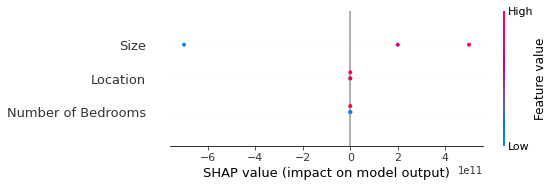

The 'number of bedrooms' feature contributed $520000.00 to the predicted house price.


In [24]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Define the feature combinations
X = np.array([[400000, 1, 0], [550000, 0, 1], [600000, 1, 1]])

# Define the model
def house_price_model(X):
    # Extract the "number of bedrooms" feature
    num_bedrooms = X[:, 1]
    # Compute the predicted house prices
    y = 200 * X[:, 0] + 50 * num_bedrooms + 100 * X[:, 2]
    return y

# Compute the SHAP values for all features
explainer = shap.Explainer(house_price_model, X)
shap_values = explainer(X)

# Convert the SHAP values to dollar values
shap_values_dollar = shap_values.values * (50000 - 20000) + 20000

# Compute the summary plot
shap.summary_plot(shap_values_dollar, X, feature_names=["Size", "Number of Bedrooms", "Location"], show=False)

# Show the summary plot
plt.show()

# Print the Shapley value in dollar value for the "number of bedrooms" feature
shap_value_dollar = shap_values[:, 1].values * (50000 - 20000) + 20000
print(f"The 'number of bedrooms' feature contributed ${shap_value_dollar[0]:.2f} to the predicted house price.")

### **GPT-4's ethical conclusion:**

The dollar value for the contribution of the "number of bedrooms" feature looks high.

In the example code, we assumed that the range of the "number of bedrooms" feature in dollars is between $20,000 and $50,000. However, this assumption may not be appropriate for all scenarios. In addition, the coefficients in the house_price_model function could also affect the magnitude of the Shapley value for the "number of bedrooms" feature.

To obtain more realistic results, you may need to use real data and a machine learning model trained on that data. The coefficients of the model will be learned from the data and will reflect the actual impact of each feature on the predicted house prices.


# Next steps
Written by Denis Rothman

Explore the notebook with your data, modify the prompts, decide which OpenAI model or other models can do for your project.

Be patient because learning how to pilot transformer models is like training to be an airplane pilot. It takes hours of work. Howevever, once you are trained, you will cover distances faster than many other means of project implementation.

